In [ ]:
%matplotlib inline
from IPython.display import display
# tag: remove-cell applied

# Tumor and Multitumor Data

Conducting dose-response analysis on dichotomous tumor data differs from analyzing standard dichotomous tumor data in the following ways:

* The Multistage cancer model uses different parameter settings for model fit than the standard Multistage model.
* A cancer slope factor is calculated.
* In some cases, there may be a need to combine multiple tumor datasets and then calculate a single cancer slope factor.

To that end, this guide covers some different approaches that you can use in `pybmds` for handling tumor data.


## Quickstart

To run a single dataset:

BMD = 35.929912
BMDL = 18.233585
CSF = 0.005484


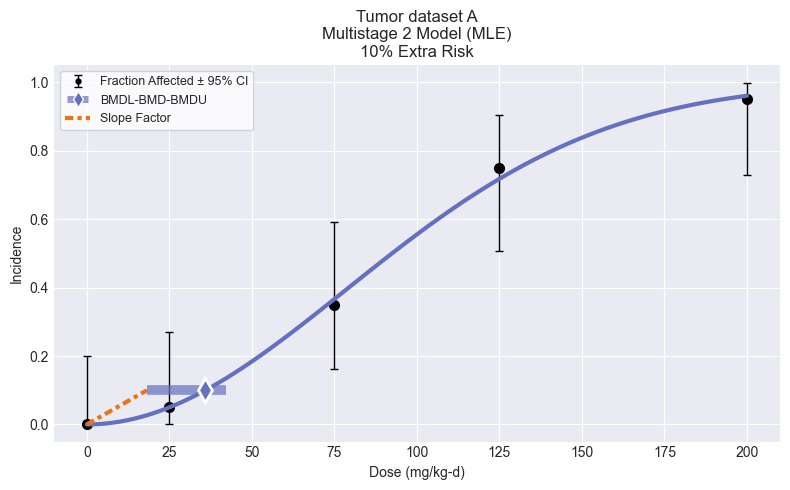

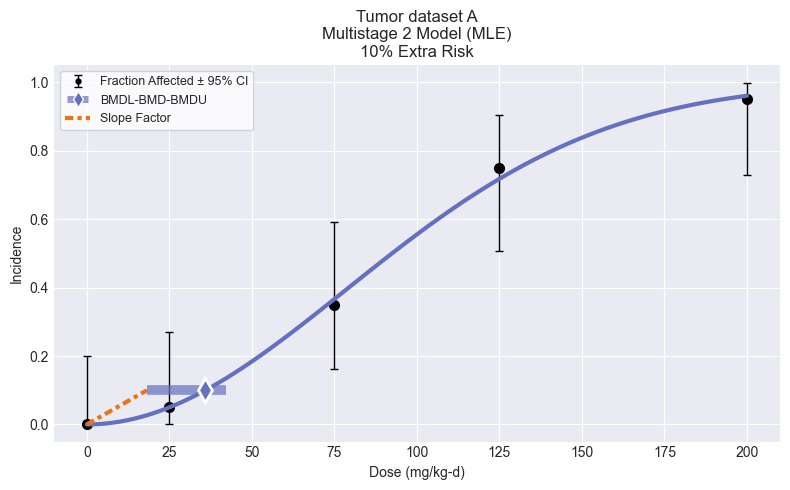

In [4]:
import pybmds
from pybmds.models.dichotomous import MultistageCancer

dataset = pybmds.DichotomousDataset(
    doses=[0, 25, 75, 125, 200],
    ns=[20, 20, 20, 20, 20],
    incidences=[0, 1, 7, 15, 19],
    name="Tumor dataset A",
    dose_units="mg/kg-d",
)

model = MultistageCancer(dataset, settings={"bmr": 0.1})
model.execute(slope_factor=True)

print(f"BMD = {model.results.bmd:f}")
print(f"BMDL = {model.results.bmdl:f}")
print(f"CSF = {model.results.slope_factor:f}")

model.plot()

To run multiple datasets and calculate a single combined slope factor:

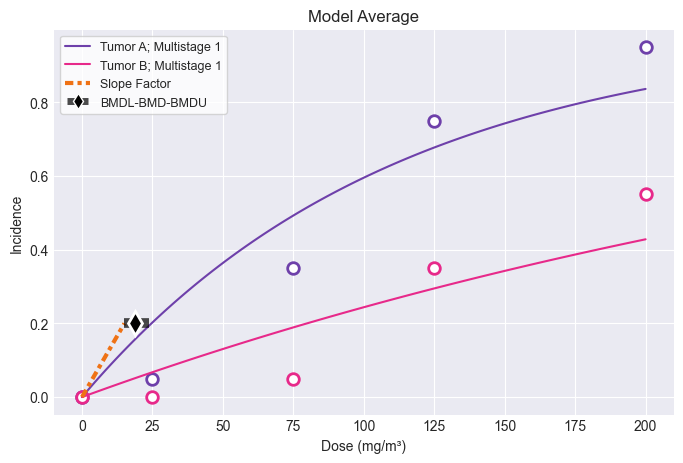

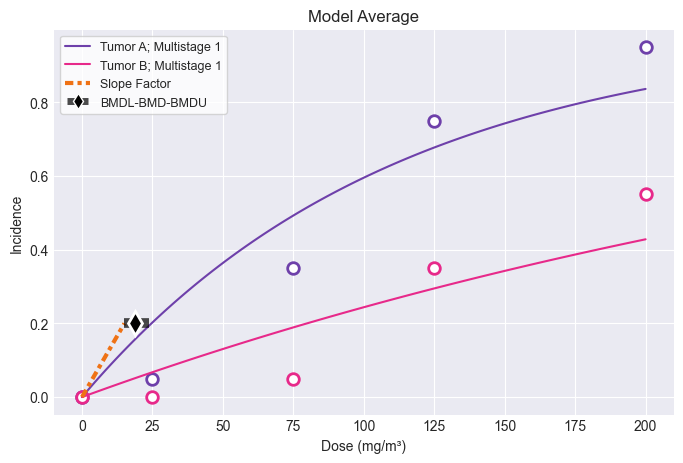

In [5]:
import pybmds

datasets = [
    pybmds.DichotomousDataset(
        doses=[0, 25, 75, 125, 200],
        ns=[20, 20, 20, 20, 20],
        incidences=[0, 1, 7, 15, 19],
        name="Tumor A",
        dose_units="mg/m³",
    ),
    pybmds.DichotomousDataset(
        doses=[0, 25, 75, 125, 200],
        ns=[20, 20, 20, 20, 20],
        incidences=[0, 0, 1, 7, 11],
        name="Tumor B",
        dose_units="mg/m³",
    ),
]

session = pybmds.Multitumor(datasets, settings={"bmr": 0.2}, name="Example")
session.execute()

session.plot()

To view individual model results for selected models for each dataset:

In [ ]:
# Print overall results
print("Overall")
print(f"BMD = {session.results.bmd:f}")
print(f"BMDL = {session.results.bmdl:f}")
print(f"CSF = {session.results.slope_factor:f}")
print()

# Print individual model results
selected_model_indexes = session.results.selected_model_indexes
for i, dataset_models in enumerate(session.models):
    selected_index = selected_model_indexes[i]
    selected_model = dataset_models[selected_index]
    print(f"{selected_model.dataset.metadata.name}: {selected_model.name()}")
    print(f"BMD = {selected_model.results.bmd:f}")
    print(f"BMDL = {selected_model.results.bmdl:f}")
    print(f"CSF = {selected_model.results.slope_factor:f}")
    print()

## Create a tumor dataset

Create a tumor dataset using the same method as a dichotomous dataset.

As with a dichotomous dataset, provide a list of doses, incidences, and the total number of subjects, one item per dose-group. 

You can also add optional attributes, such as `name`, `dose_name`, `dose_units`, `response_name`, `response_units`, etc.

╒════════╤═════════════╤═════╕
│   Dose │   Incidence │   N │
╞════════╪═════════════╪═════╡
│      0 │           0 │  20 │
│     25 │           1 │  20 │
│     75 │           7 │  20 │
│    125 │          15 │  20 │
│    200 │          19 │  20 │
╘════════╧═════════════╧═════╛


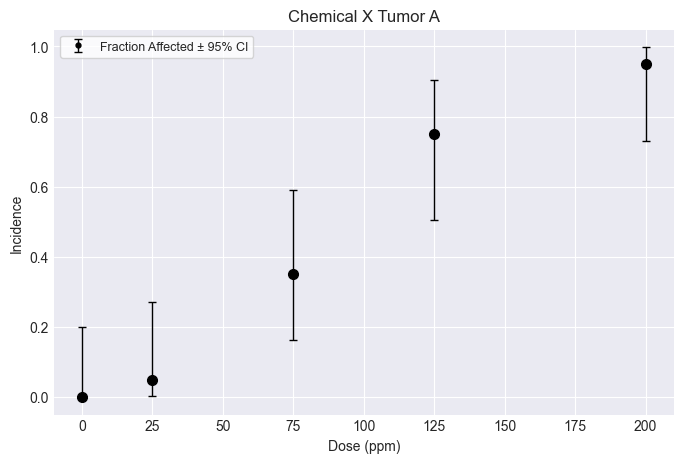

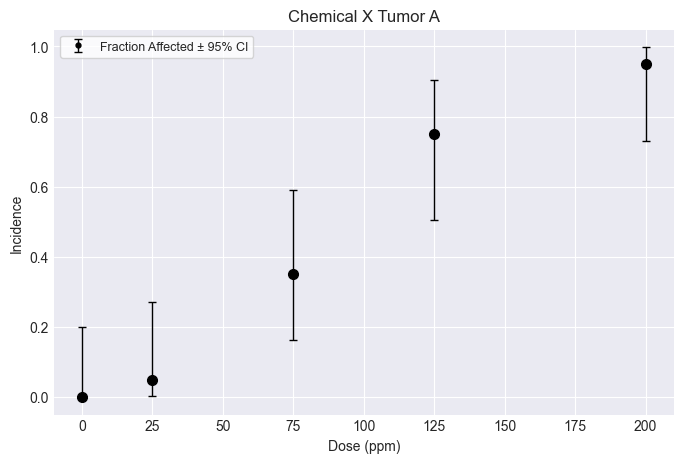

In [6]:
dataset = pybmds.DichotomousDataset(
    name="Chemical X Tumor A",
    dose_units="ppm",
    doses=[0, 25, 75, 125, 200],
    ns=[20, 20, 20, 20, 20],
    incidences=[0, 1, 7, 15, 19],
)

print(dataset.tbl())
dataset.plot()

## Single dataset fit

With a single tumor dataset defined above, you can run a single Multistage cancer model:

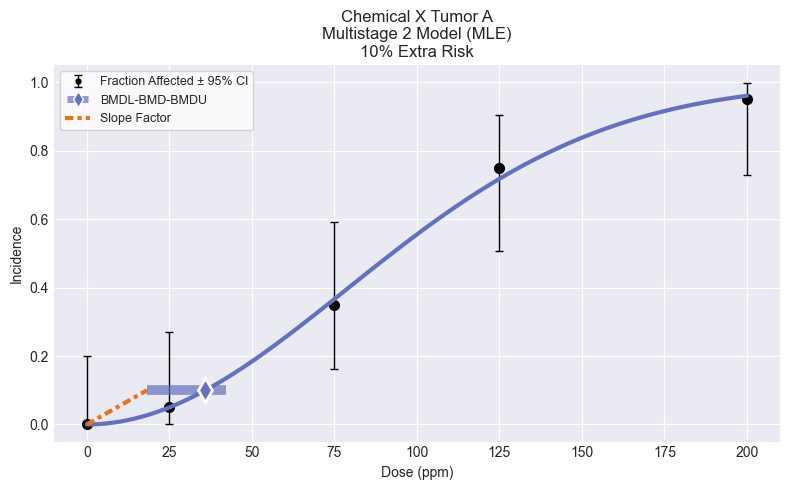

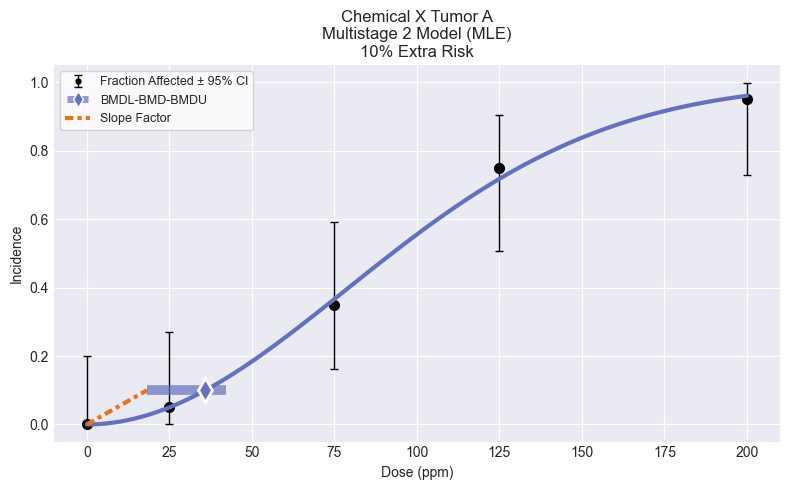

In [7]:
import pybmds
from pybmds.models.dichotomous import MultistageCancer

model = MultistageCancer(dataset, settings={"bmr": 0.10, "degree": 2})
model.execute(slope_factor=True)
model.plot()

After executing, results are stored in a `results` attribute on the model. You can view individual items in the results by accessing:

In [ ]:
print(model.name())
print(f"BMD = {session.results.bmd:f}")
print(f"BMDL = {session.results.bmdl:f}")
print(f"CSF = {session.results.slope_factor:f}")

Or generate a text report to view a summary:

In [ ]:
print(model.text())

### Change input settings

Model settings can be customized for a run, as with standard dichotomous models.

In [8]:
model = MultistageCancer(
    dataset, 
    settings={
        "bmr_type": pybmds.DichotomousRiskType.AddedRisk, 
        "bmr": 0.15, 
        "degree": 3,
    },
)
print(model.settings.tbl())

╒══════════════════════════════╤════════════════════════╕
│ BMR                          │ 15% Added Risk         │
│ Confidence Level (one sided) │ 0.95                   │
│ Modeling approach            │ frequentist_restricted │
│ Degree                       │ 3                      │
╘══════════════════════════════╧════════════════════════╛


### Change parameter settings

Initial parameter settings are different for the `MultistageCancer` model compared with the dichotomous `Multistage`:

In [9]:
from pybmds.models.dichotomous import Multistage, MultistageCancer

model = Multistage(dataset)
print("Multistage parameter settings:")
print(model.priors_tbl())

model = MultistageCancer(dataset)
print("Multistage Cancer parameter settings:")
print(model.priors_tbl())

Multistage parameter settings:
╒═════════════╤═══════════╤═══════╤═══════╕
│ Parameter   │   Initial │   Min │   Max │
╞═════════════╪═══════════╪═══════╪═══════╡
│ g           │         0 │   -18 │    18 │
│ b1          │         0 │     0 │ 10000 │
│ b2          │         0 │     0 │ 10000 │
╘═════════════╧═══════════╧═══════╧═══════╛
Multistage Cancer parameter settings:
╒═════════════╤═══════════╤═══════╤═══════╕
│ Parameter   │   Initial │   Min │   Max │
╞═════════════╪═══════════╪═══════╪═══════╡
│ g           │     -17   │   -18 │    18 │
│ b1          │       0.1 │     0 │ 10000 │
│ b2          │       0.1 │     0 │ 10000 │
╘═════════════╧═══════════╧═══════╧═══════╛


For Multistage models, the `b2` parameter setting is reused for all beta parameters greater than or equal to b2.

These can be updated:

In [ ]:
model.settings.priors.update("g", initial_value=0, min_value=-10, max_value=10)
model.settings.priors.update("b1", initial_value=10, min_value=0, max_value=100)
model.settings.priors.update("b2", initial_value=20, min_value=0, max_value=1000)

print(model.priors_tbl())

### Fit multiple models

The previous example runs a single Multitumor model to a single dataset. However, you may want, for example, to run multiple multitumor models of varying degrees to a single dataset. 

## Multiple dataset fit

To fit multiple models and one or more datasets, use an instance of the Multitumor class:

In [ ]:
import pybmds

datasets = [
    pybmds.DichotomousDataset(
        doses=[0, 25, 75, 125, 200],
        ns=[20, 20, 20, 20, 20],
        incidences=[0, 1, 7, 15, 19],
        name="Tumor A",
        dose_units="mg/m³",
    ),
    pybmds.DichotomousDataset(
        doses=[0, 25, 75, 125, 200],
        ns=[20, 20, 20, 20, 20],
        incidences=[0, 0, 1, 7, 11],
        name="Tumor B",
        dose_units="mg/m³",
    ),
]

session = pybmds.Multitumor(datasets)
session.execute()

print(session.results.tbl())
session.plot()

You can generate Excel and Word exports:

In [ ]:
# save excel report
df = session.to_df()
df.to_excel("output/report.xlsx")

# save to a word report
report = session.to_docx()
report.save("output/report.docx")

### Change model settings

Settings for all datasets and models should be configured globally and are applied to all models:

In [ ]:
session = pybmds.Multitumor(datasets, settings={
    "bmr_type": pybmds.DichotomousRiskType.AddedRisk, 
    "bmr": 0.15,
})

### Change model degree

By default, multiple models are executed for each dataset, where the degree is varied from 1 to the number of doses minus 1 (and a maximum of 8). 

For this example, we first create three datasets:

In [ ]:
datasets = [
    pybmds.DichotomousDataset(
        doses=[0, 2, 3, 4, 5, 6, 7, 8, 9],
        ns=[20, 20, 20, 20, 20, 20, 20, 20, 20],
        incidences=[0, 1, 4, 8, 11, 12, 13, 14, 15],
        name="Tumor A (9 groups)",
        dose_units="mg/m³",
    ),
    pybmds.DichotomousDataset(
        doses=[0, 2, 3, 4, 5, 6, 7, 8, 9],
        ns=[20, 20, 20, 20, 20, 20, 20, 20, 20],
        incidences=[0, 1, 7, 15, 19, 19, 19, 19, 19],
        name="Tumor B (9 groups)",
        dose_units="mg/m³",
    ),
    pybmds.DichotomousDataset(
        doses=[0, 2, 3, 4, 5],
        ns=[20, 20, 20, 20, 20],
        incidences=[0, 0, 1, 7, 11],
        name="Tumor C (5 groups)",
        dose_units="mg/m³",
    ),
]

Next, we specify which model degrees to run for each dataset using `degrees`. Setting a value of 0 runs all degrees available up to a maximum of 8; specifying a specific degree will only run the specified degree.

In [ ]:
degrees = [0, 3, 2]
session = pybmds.Multitumor(datasets, degrees=degrees)
session.execute()
session.plot()

The analysis executed the following models for each dataset:

In [ ]:
for dataset_models in session.models:
    print(f"{dataset_models[0].dataset.metadata.name}")
    for model in dataset_models:
        print("\t" + model.name())

Note that the `Multistage` and `MultistageCancer` models both use the standard model selection workflow for dichotomous data (see [BMDS User Guide](https://usepa.github.io/bmds-user-guide/)), whereas the `Multitumor` model uses a modifed workflow specific to use of the multistage model specifically for cancer endpoints.  If users would like to apply the modified Multistage model selection workflow on individual tumors, they can simply run the `Multitumor` model on single tumor datasets.

For illustration, consider the dataset below, modeled with the Multistage Cancer model:

BMD = 0.092372
BMDL = 0.079245
CSF = 1.261917
      Multistage 2 Model      
══════════════════════════════

Version: pybmds 25.2a2 (bmdscore 25.1)

Input Summary:
╒══════════════════════════════╤════════════════════════╕
│ BMR                          │ 10% Extra Risk         │
│ Confidence Level (one sided) │ 0.95                   │
│ Modeling approach            │ frequentist_restricted │
│ Degree                       │ 2                      │
╘══════════════════════════════╧════════════════════════╛

Parameter Settings:
╒═════════════╤═══════════╤═══════╤═══════╕
│ Parameter   │   Initial │   Min │   Max │
╞═════════════╪═══════════╪═══════╪═══════╡
│ g           │     -17   │   -18 │    18 │
│ b1          │       0.1 │     0 │ 10000 │
│ b2          │       0.1 │     0 │ 10000 │
╘═════════════╧═══════════╧═══════╧═══════╛

Modeling Summary:
╒════════════════╤═════════════╕
│ BMD            │   0.0923719 │
│ BMDL           │   0.0792445 │
│ BMDU           │   0.10957   │
│ Slope 

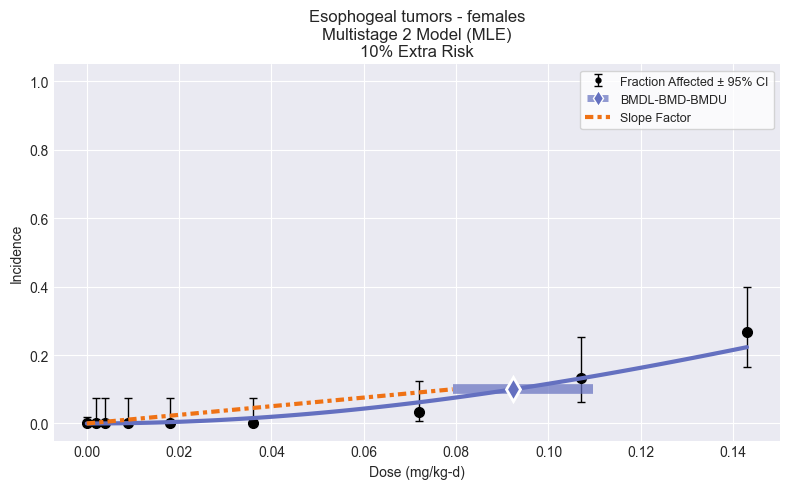

In [10]:
%matplotlib inline
import pybmds
from pybmds.models.dichotomous import MultistageCancer

dataset = pybmds.DichotomousDataset(
        doses=[0, 0.002, 0.004, 0.009, 0.018, 0.036, 0.072, 0.107, 0.143],
        ns=[240, 60, 60, 60, 60, 60, 60, 60, 60],
        incidences=[0, 0, 0, 0, 0, 0, 2, 8, 16],
        name="Esophogeal tumors - females",
        dose_units="mg/kg-d",
)

model = MultistageCancer(dataset, settings={"bmr": 0.1})
model.execute(slope_factor=True)

print(f"BMD = {model.results.bmd:f}")
print(f"BMDL = {model.results.bmdl:f}")
print(f"CSF = {model.results.slope_factor:f}")

model.plot()
print(model.text())

In this case, the 2nd degree Multistage model has been selected based on the standard dichotomous model selection workflow.  

If this same tumor dataset was modeled along with another tumor dataset with the Multitumor model, the results would be:

╒══════════════════════════════════╤═══════════════╕
│ BMD                              │     0.0234891 │
│ BMDL                             │     0.0102818 │
│ BMDU                             │     0.0234891 │
│ Slope Factor                     │     9.72596   │
│ Combined Log-likelihood          │  -292.531     │
│ Combined Log-likelihood Constant │ -9999         │
╘══════════════════════════════════╧═══════════════╛


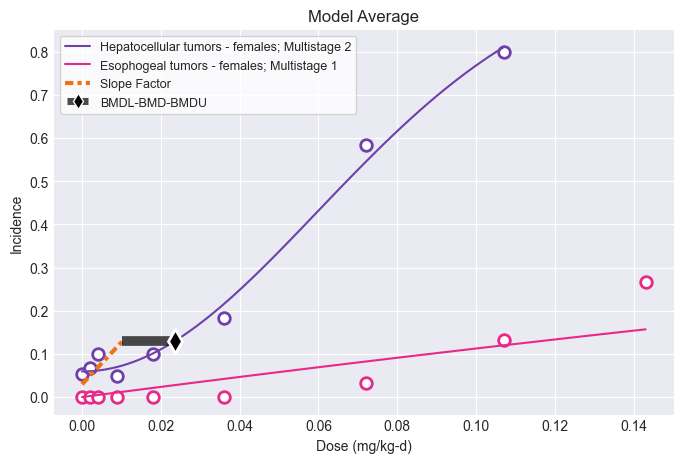

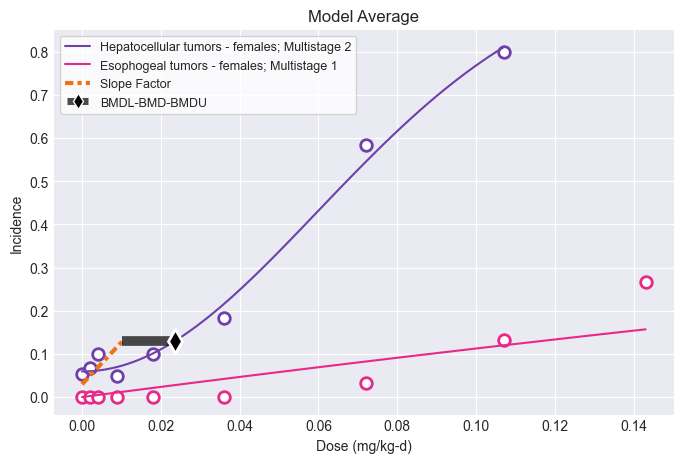

In [11]:
datasets = [
    pybmds.DichotomousDataset(
        doses=[0, 0.002, 0.004, 0.009, 0.018, 0.036, 0.072, 0.107],
        ns=[240, 60, 60, 60, 60, 60, 60, 60],
        incidences=[13, 4, 6, 3, 6, 11, 35, 48],
        name="Hepatocellular tumors - females",
        dose_units="mg/kg-d",
    ),
    pybmds.DichotomousDataset(
        doses=[0, 0.002, 0.004, 0.009, 0.018, 0.036, 0.072, 0.107, 0.143],
        ns=[240, 60, 60, 60, 60, 60, 60, 60, 60],
        incidences=[0, 0, 0, 0, 0, 0, 2, 8, 16],
        name="Esophogeal tumors - females",
        dose_units="mg/kg-d",
    ),
]

session = pybmds.Multitumor(datasets)
session.execute()

print(session.results.tbl())
session.plot()

Observe that when the esophogeal tumors are modeled with the Multitumor model, the 1st degree Multistage model is selected using the modified Multistage model selection workflow.  

Users can apply the modified workflow to single tumor datasets by simply running the Multitumor model on indiviudal datasets:

╒══════════════════════════════════╤═══════════════╕
│ BMD                              │     0.0882326 │
│ BMDL                             │     0.0649418 │
│ BMDU                             │     0.0882326 │
│ Slope Factor                     │     1.53984   │
│ Combined Log-likelihood          │   -75.673     │
│ Combined Log-likelihood Constant │ -9999         │
╘══════════════════════════════════╧═══════════════╛


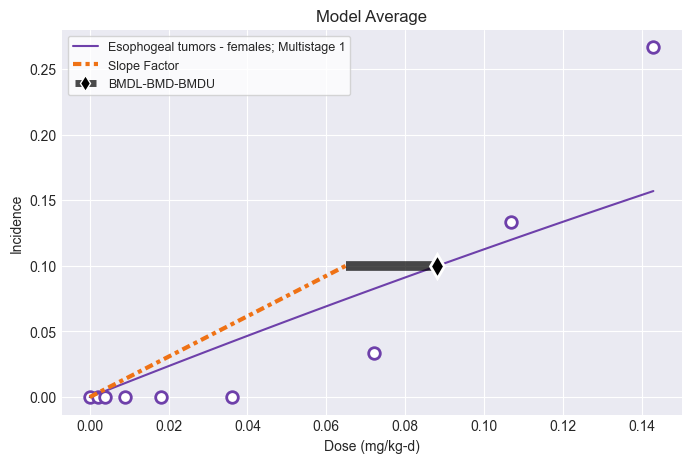

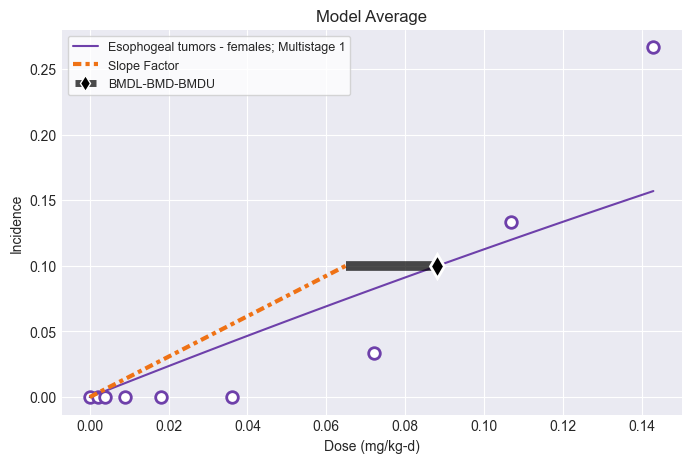

In [13]:
datasets = [
    pybmds.DichotomousDataset(
        doses=[0, 0.002, 0.004, 0.009, 0.018, 0.036, 0.072, 0.107, 0.143],
        ns=[240, 60, 60, 60, 60, 60, 60, 60, 60],
        incidences=[0, 0, 0, 0, 0, 0, 2, 8, 16],
        name="Esophogeal tumors - females",
        dose_units="mg/kg-d",
    ),
]

session = pybmds.Multitumor(datasets)
session.execute()

print(session.results.tbl())
session.plot()